In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-image-dataset


In [ ]:
# Importing necessary libraries

# Building deep learning models

from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



arborio images found: 300
basmati images found: 300
ipsala images found: 300
jasmine images found: 300
karacadag images found: 300
Sample image shape: (250, 250, 3)


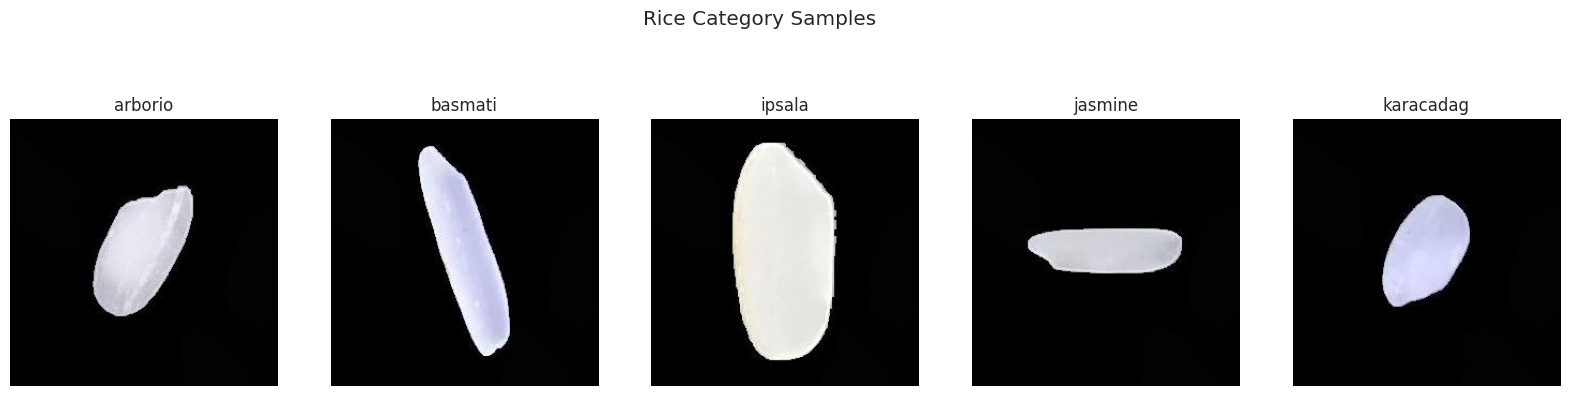

In [ ]:
# Import required libraries
import pathlib
import cv2
import matplotlib.pyplot as plt
import os

# Set dataset directory (update path if running locally)
data_dir = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

# Load image paths for each category
arborio   = list(data_dir.glob('Arborio/*'))[:300]
basmati   = list(data_dir.glob('Basmati/*'))[:300]
ipsala    = list(data_dir.glob('Ipsala/*'))[:300]
jasmine   = list(data_dir.glob('Jasmine/*'))[:300]
karacadag = list(data_dir.glob('Karacadag/*'))[:300]

# Map image paths into a dictionary
df_images = {
    'arborio'  : arborio,
    'basmati'  : basmati,
    'ipsala'   : ipsala,
    'jasmine'  : jasmine,
    'karacadag': karacadag
}

# Map numerical labels for categories
df_labels = {
    'arborio'  : 0,
    'basmati'  : 1,
    'ipsala'   : 2,
    'jasmine'  : 3,
    'karacadag': 4
}

# Check number of images loaded in each category
for category in df_images:
    print(f"{category} images found: {len(df_images[category])}")

# Load and display shape of one sample image
sample_image_path = df_images['arborio'][0]
img = cv2.imread(str(sample_image_path))
print("Sample image shape:", img.shape)

# Plot sample images from each category
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category Samples')

# Load one image per category and display
categories = ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']

for i, cat in enumerate(categories):
    image = cv2.imread(str(df_images[cat][0]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
    ax[i].imshow(image)
    ax[i].set_title(cat)
    ax[i].axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np
import pathlib
from sklearn.model_selection import train_test_split

# Path to your dataset
data_dir = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

# Category names and labels
categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
labels = {cat: i for i, cat in enumerate(categories)}

# Empty lists to store images and labels
X = []
y = []

# Read images and labels into lists
for category in categories:
    image_paths = list((data_dir / category).glob('*'))[:200]  # Take up to 600 images per category
    for img_path in image_paths:
        img = cv2.imread(str(img_path))
        if img is not None:
            img = cv2.resize(img, (250, 250))  # Ensure consistent size
            X.append(img)
            y.append(labels[category])

print(f"Loaded {len(X)} images.")


Loaded 1000 images.


In [ ]:
# Convert lists to NumPy arrays
import numpy as np
X = np.array(X)
X = X / 255.0  # Normalize to [0,1]
y = np.array(y)

# Split into train, test+val
X_train, X_test_val, y_train, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Further split test+val into test and val
X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

# Check shapes
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (800, 250, 250, 3), (800,)
Validation shape: (100, 250, 250, 3), (100,)
Test shape: (100, 250, 250, 3), (100,)


In [ ]:
X.shape

(1000, 250, 250, 3)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
le=LabelEncoder()
labelled_y=le.fit_transform(y)
labelled_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
onehot=to_categorical(labelled_y)
onehot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), activation= 'relu', input_shape = (250,250,3)),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,503,242 (116.36 MB)

 Trainable params: 30,503,242 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 3
batch_size= 8
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:


history = model.fit(
    X_train,
    y_train,
    epochs=3,               # reduce for testing
    batch_size=8,           # smaller batch size to reduce memory
    callbacks=[callback],   # wrapped in list
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/3
100/100 - 118s - 1s/step - accuracy: 0.7475 - loss: 0.7843 - val_accuracy: 0.8400 - val_loss: 0.4169
Epoch 2/3
100/100 - 142s - 1s/step - accuracy: 0.9675 - loss: 0.1036 - val_accuracy: 0.8700 - val_loss: 0.3435
Epoch 3/3
100/100 - 137s - 1s/step - accuracy: 0.9750 - loss: 0.0672 - val_accuracy: 0.9200 - val_loss: 0.3891


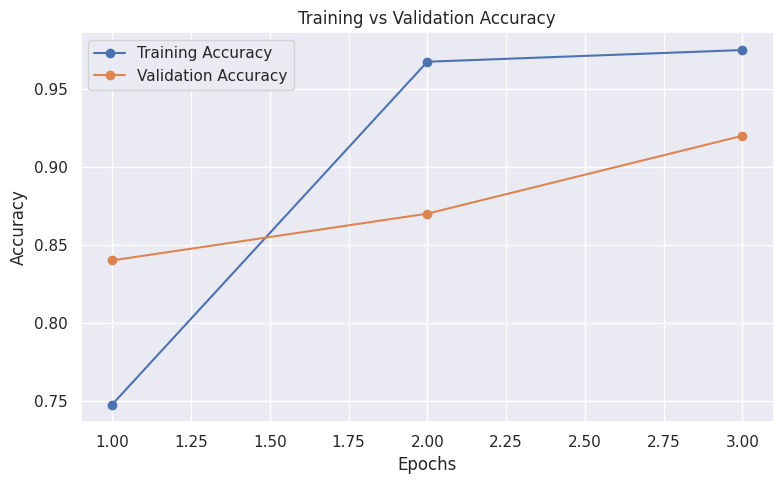

In [ ]:
accu = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(accu) + 1)  # This line was missing in your code

plt.figure(figsize=(8, 5))
plt.plot(epochs, accu, label='Training Accuracy', marker='o')
plt.plot(epochs, val, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model.save('my_model.keras')

In [ ]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.8678 - loss: 0.3011


[0.34350064396858215, 0.8700000047683716]

In [ ]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step


In [ ]:
y_predict_label = np.argmax(y_pred,axis=1)

In [ ]:
y_pred_label = pd.Series(y_predict_label)

In [ ]:
mapping = {
    0:'Arborio',
    1:'Basmati',
    2:'Ipsala',
    3:'Jasmine',
    4:'Karacadag'
}

In [ ]:
y_predicted_classes = y_pred_label.map(mapping)

In [ ]:
y_predicted_classes

,0
0,Karacadag
1,Basmati
2,Ipsala
3,Ipsala
4,Jasmine
...,...
95,Ipsala
96,Karacadag
97,Ipsala
98,Arborio


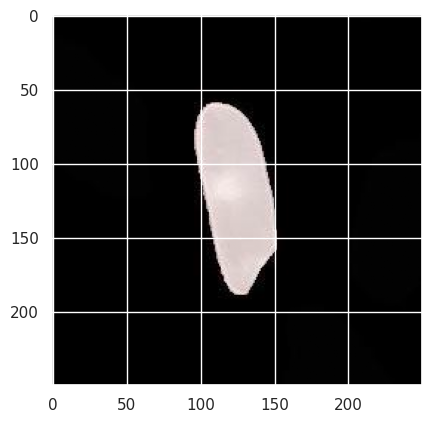

In [ ]:
img_path = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (1014).jpg"
sample_img = cv2.imread(img_path)
resized_image = cv2.resize(sample_img, (250,250))

transformed_img = resized_image/255

plt.imshow(transformed_img)

In [ ]:
img = np.expand_dims(transformed_img, axis=0)

output = model.predict(img)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[5.0998353e-03, 1.3554696e-03, 1.3696585e-06, 9.9348652e-01,
        4.9752856e-05, 1.3144949e-06, 1.6569836e-06, 3.7082702e-06,
        6.4529033e-08, 3.3957761e-07]], dtype=float32)

In [ ]:
predict = np.argmax(output)
predict = pd.Series(predict)
predict.map(mapping)

,0
0,Jasmine


In [ ]:
from google.colab import files
files.download('my_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>